<a href="https://colab.research.google.com/github/ErlanPrambudi/Project-Yolo/blob/master/Shoes_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!/usr/local/cuda/bin/nvcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2023 NVIDIA Corporation
Built on Tue_Aug_15_22:02:13_PDT_2023
Cuda compilation tools, release 12.2, V12.2.140
Build cuda_12.2.r12.2/compiler.33191640_0


In [ ]:
!nvidia-smi

Tue Dec 19 19:33:00 2023       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   35C    P8               9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [ ]:
%cd /content/
%rm -rf darknet

/content


In [ ]:
!git clone https://github.com/AlexeyAB/darknet

Cloning into 'darknet'...
remote: Enumerating objects: 15833, done.
remote: Total 15833 (delta 0), reused 0 (delta 0), pack-reused 15833
Receiving objects: 100% (15833/15833), 14.35 MiB | 2.80 MiB/s, done.
Resolving deltas: 100% (10670/10670), done.


In [ ]:
%cd darknet

/content/darknet


In [ ]:
!sed -i 's/OPENCV=0/OPENCV=1/' Makefile
!sed -i 's/GPU=0/GPU=1/' Makefile
!sed -i 's/CUDNN=0/CUDNN=1/' Makefile
!sed -i 's/CUDNN_HALF=0/CUDNN_HALF=1/' Makefile

In [ ]:
!make

mkdir -p ./obj/
mkdir -p backup
mkdir -p results
chmod +x *.sh
g++ -std=c++11 -std=c++11 -Iinclude/ -I3rdparty/stb/include -DOPENCV `pkg-config --cflags opencv4 2> /dev/null || pkg-config --cflags opencv` -DGPU -I/usr/local/cuda/include/ -DCUDNN -DCUDNN_HALF -Wall -Wfatal-errors -Wno-unused-result -Wno-unknown-pragmas -fPIC -rdynamic -Ofast -DOPENCV -DGPU -DCUDNN -I/usr/local/cudnn/include -DCUDNN_HALF -c ./src/image_opencv.cpp -o obj/image_opencv.o
./src/image_opencv.cpp: In function ‘void draw_detections_cv_v3(void**, detection*, int, float, char**, image**, int, int)’:
./src/image_opencv.cpp:945:23: warning: variable ‘rgb’ set but not used []8;;https://gcc.gnu.org/onlinedocs/gcc/Warning-Options.html#index-Wunused-but-set-variable-Wunused-but-set-variable]8;;]
  945 |                 float rgb[3];
      |                       ^~~
./src/image_opencv.cpp: In function ‘void cv_draw_object(image, float*, int, int, int*, float*, int*, int, char**)’:
./src/image_opencv.cpp:1443:14: wa

In [ ]:
repo_url = 'https://github.com/ErlanPrambudi/Project-Yolo'
import os
%cd /content
repo_dir_path = os.path.abspath(os.path.join('.' ,os.path.basename(repo_url)))
!git clone {repo_url}
%cd {repo_dir_path}

/content
fatal: destination path 'Project-Yolo' already exists and is not an empty directory.
/content/Project-Yolo


In [ ]:

def imShow(path):
  import cv2
  import matplotlib.pyplot as plt
  %matplotlib inline

  image = cv2.imread(path)
  height,width = image.shape[:2]
  resized_image = cv2.resize(image,(3*width,3*height),interpolation = cv2.INTER_CUBIC)

  fig = plt.gcf()
  fig.set_size_inches(18,10)
  plt.axis("off")
  plt.imshow(cv2.cvtColor(resized_image,cv2.COLOR_BGR2RGB))
  plt.show()

In [ ]:
labels_path = '/content/Project-Yolo/obj.names'
labels = ['adidas','nike']
with open(labels_path,'w') as f:

  f.write('\n'.join(labels))

!cat /content/Project-Yolo/obj.names



adidas
nike

In [ ]:
import re
objdata = '/content/Project-Yolo/obj.data'
with open(objdata) as f:
  s = f.read()

num_classes = len(labels)
s=re.sub('classes = \d*','classes = ' +str(num_classes),s)

with open(objdata,'w') as f:
  f.write(s)
!cat /content/Project-Yolo/obj.data

classes= 2
train  = /content/Project-Yolo/train.txt
valid  = /content/Project-Yolo/valid.txt
names = /content/Project-Yolo/obj.names
backup = backup/

In [ ]:
max_batch = 4000
step1 = 0.8*max_batch
step2 = 0.9*max_batch

num_filters = (num_classes + 5)*3

cfg_file = '/content/Project-Yolo/yolov4-tiny.cfg'

with open(cfg_file) as f:
  s = f.read()

s = re.sub('max_batches = \d*','max_batches = '+str(max_batch),s)
s = re.sub('steps = \d*,\d*','steps = '+"{:.0f}".format(step1)+','+"{:.0f}".format(step2),s)
s = re.sub('classes = \d*','classes = '+str(num_classes),s)
s = re.sub('pad = 1 \nfilters\d*','pad = 1\nfilters='+"{:.0f}".format(num_filters),s)

with open(cfg_file,'w') as f:
  f.write(s)

In [ ]:
%cd /content/darknet/
!./darknet detector train /content/Project-Yolo/obj.data /content/Project-Yolo/yolov4-tiny.cfg /content/Project-Yolo/yolov4-tiny.conv.29 -dont_show -ext_output -map

Streaming output truncated to the last 5000 lines.

 (next mAP calculation at 3600 iterations) 

 Tensor Cores are used.
 Last accuracy mAP@0.50 = 70.37 %, best = 77.42 % 3523/4000: loss=0.0 map=0.70 best=0.77 hours left=0.1
 3523: 0.043352, 0.056252 avg loss, 0.002610 rate, 0.695927 seconds, 225472 images, 0.096712 hours left
Loaded: 0.000091 seconds
v3 (iou loss, Normalizer: (iou: 0.07, obj: 1.00, cls: 1.00) Region 30 Avg (IOU: 0.844463), count: 78, class_loss = 0.233278, iou_loss = 0.110406, total_loss = 0.343684 
v3 (iou loss, Normalizer: (iou: 0.07, obj: 1.00, cls: 1.00) Region 37 Avg (IOU: 0.795117), count: 1, class_loss = 0.024125, iou_loss = 0.016800, total_loss = 0.040926 
 total_bbox = 304287, rewritten_bbox = 0.011502 % 

 (next mAP calculation at 3600 iterations) 

 Tensor Cores are used.
 Last accuracy mAP@0.50 = 70.37 %, best = 77.42 % 3524/4000: loss=0.1 map=0.70 best=0.77 hours left=0.1
 3524: 0.128899, 0.063516 avg loss, 0.002610 rate, 0.555968 seconds, 225536 images

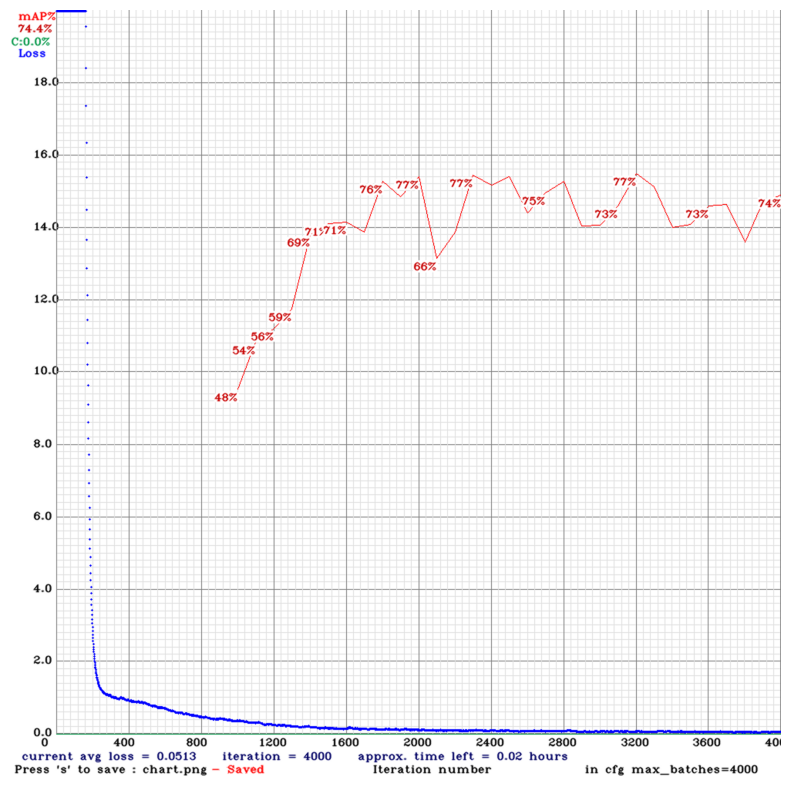

In [ ]:
imShow("chart_yolov4-tiny.png")

In [ ]:
%cd ../darknet/
!./darknet detector map /content/Project-Yolo/obj.data /content/Project-Yolo/yolov4-tiny.cfg "/content/darknet/backup/yolov4-tiny_best.weights" /content/Project-Yolo/yolov4-tiny.conv.29 -dont_show -ext_output -map

/content/darknet
 CUDA-version: 12020 (12020), cuDNN: 8.9.6, CUDNN_HALF=1, GPU count: 1  
 CUDNN_HALF=1 
 OpenCV version: 4.5.4
 0 : compute_capability = 750, cudnn_half = 1, GPU: Tesla T4 
net.optimized_memory = 0 
mini_batch = 1, batch = 1, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 Create CUDA-stream - 0 
 Create cudnn-handle 0 
conv     32       3 x 3/ 2    416 x 416 x   3 ->  208 x 208 x  32 0.075 BF
   1 conv     64       3 x 3/ 2    208 x 208 x  32 ->  104 x 104 x  64 0.399 BF
   2 conv     64       3 x 3/ 1    104 x 104 x  64 ->  104 x 104 x  64 0.797 BF
   3 route  2 		                       1/2 ->  104 x 104 x  32 
   4 conv     32       3 x 3/ 1    104 x 104 x  32 ->  104 x 104 x  32 0.199 BF
   5 conv     32       3 x 3/ 1    104 x 104 x  32 ->  104 x 104 x  32 0.199 BF
   6 route  5 4 	                           ->  104 x 104 x  64 
   7 conv     64       1 x 1/ 1    104 x 104 x  64 ->  104 x 104 x  64 0.089 BF
   8 

 CUDA-version: 12020 (12020), cuDNN: 8.9.6, CUDNN_HALF=1, GPU count: 1  
 CUDNN_HALF=1 
 OpenCV version: 4.5.4
 0 : compute_capability = 750, cudnn_half = 1, GPU: Tesla T4 
net.optimized_memory = 0 
mini_batch = 1, batch = 1, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 Create CUDA-stream - 0 
 Create cudnn-handle 0 
conv     32       3 x 3/ 2    416 x 416 x   3 ->  208 x 208 x  32 0.075 BF
   1 conv     64       3 x 3/ 2    208 x 208 x  32 ->  104 x 104 x  64 0.399 BF
   2 conv     64       3 x 3/ 1    104 x 104 x  64 ->  104 x 104 x  64 0.797 BF
   3 route  2 		                       1/2 ->  104 x 104 x  32 
   4 conv     32       3 x 3/ 1    104 x 104 x  32 ->  104 x 104 x  32 0.199 BF
   5 conv     32       3 x 3/ 1    104 x 104 x  32 ->  104 x 104 x  32 0.199 BF
   6 route  5 4 	                           ->  104 x 104 x  64 
   7 conv     64       1 x 1/ 1    104 x 104 x  64 ->  104 x 104 x  64 0.089 BF
   8 route  2 7 	     

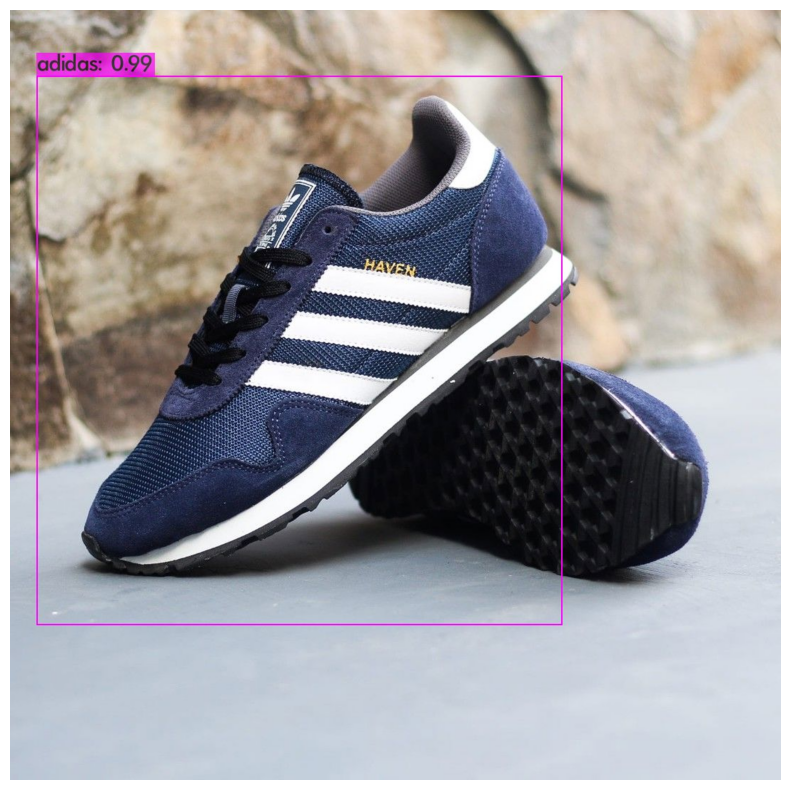

In [ ]:
!./darknet detector test /content/Project-Yolo/obj.data /content/Project-Yolo/yolov4-tiny.cfg /content/darknet/backup/yolov4-tiny_best.weights /content/Project-Yolo/adidas.jpg -ext_output

imShow('/content/darknet/predictions.jpg')